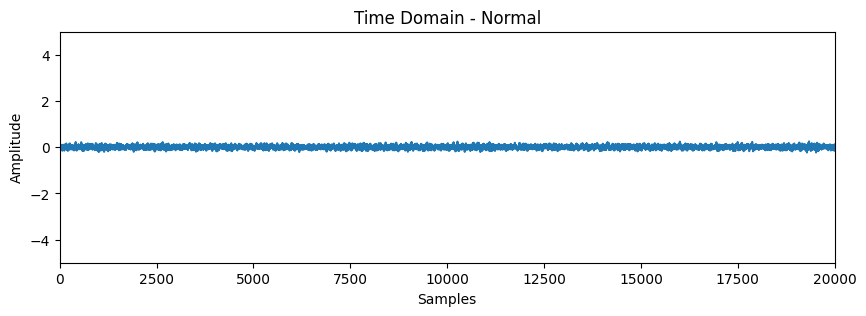

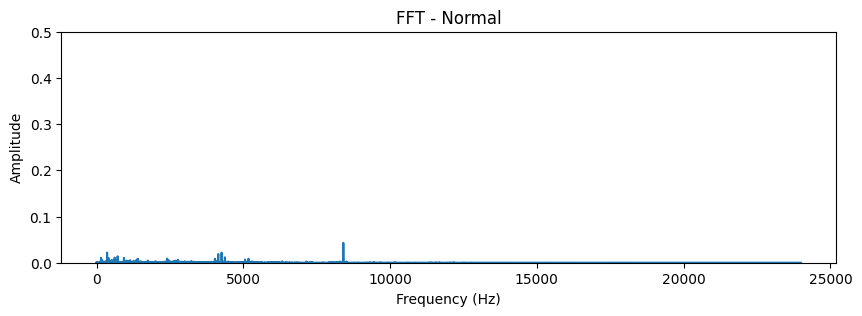

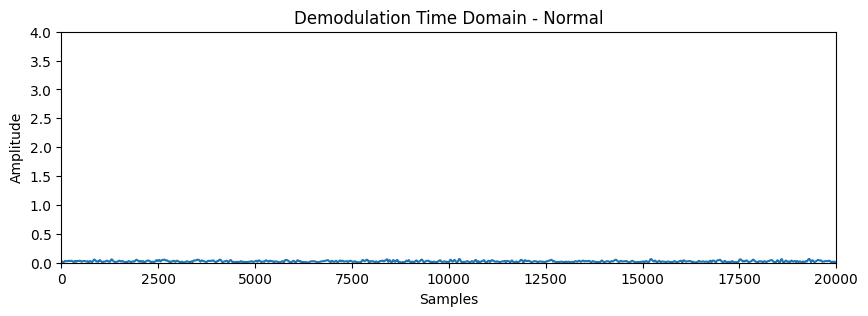

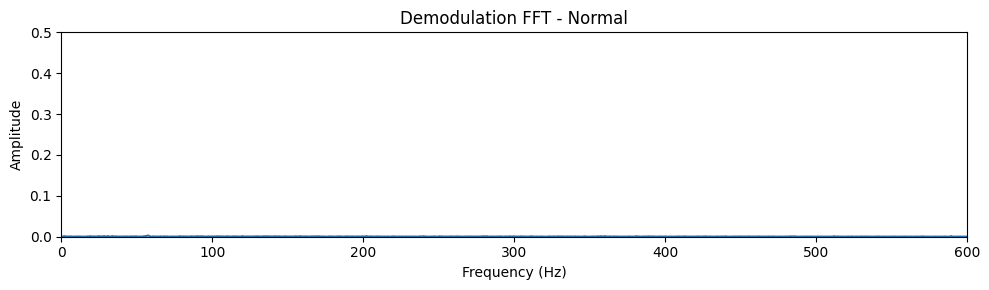

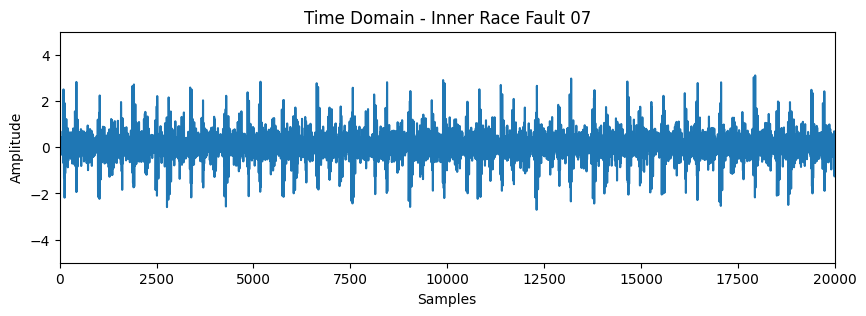

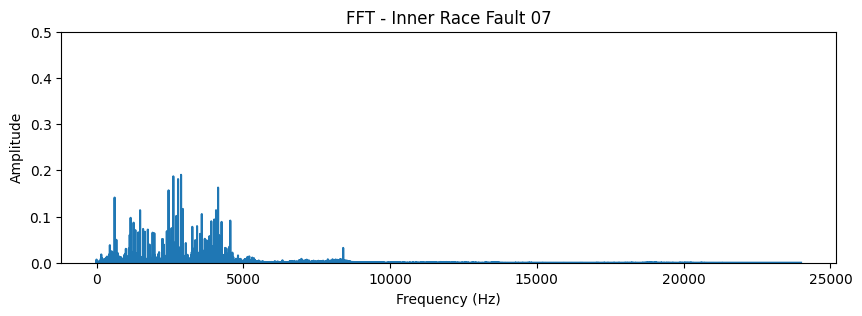

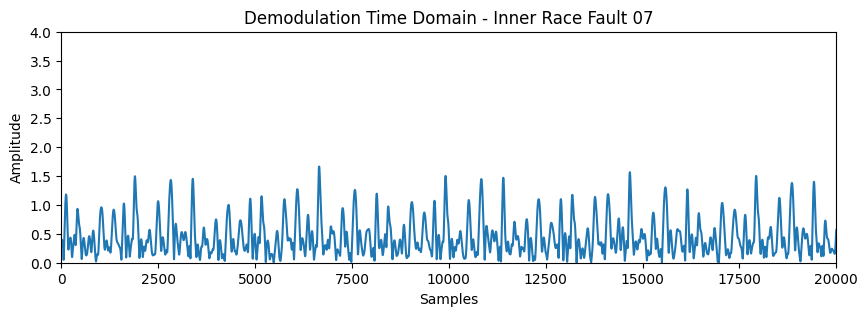

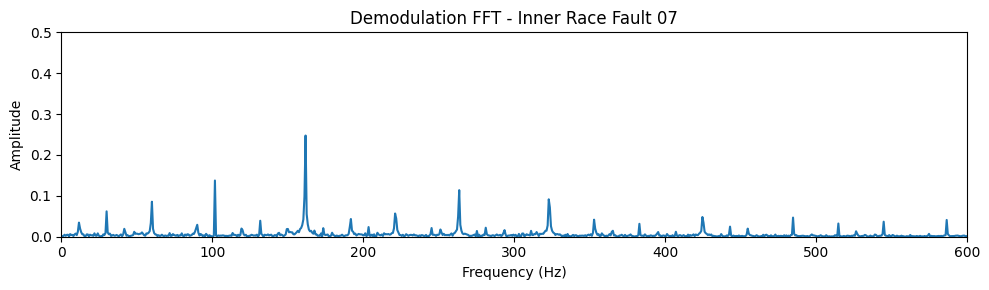

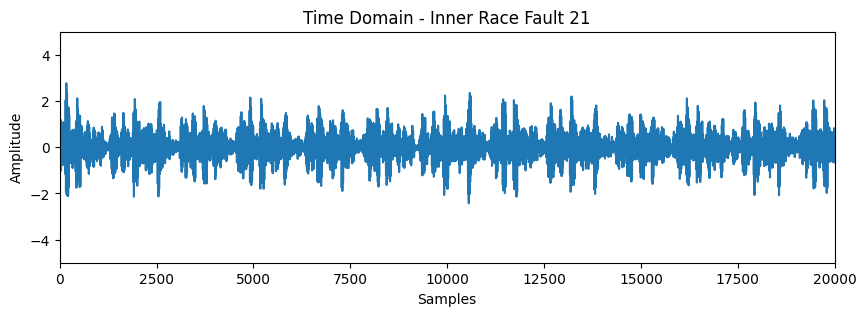

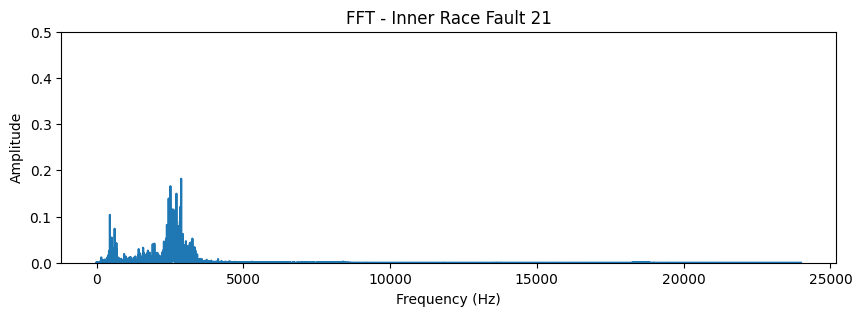

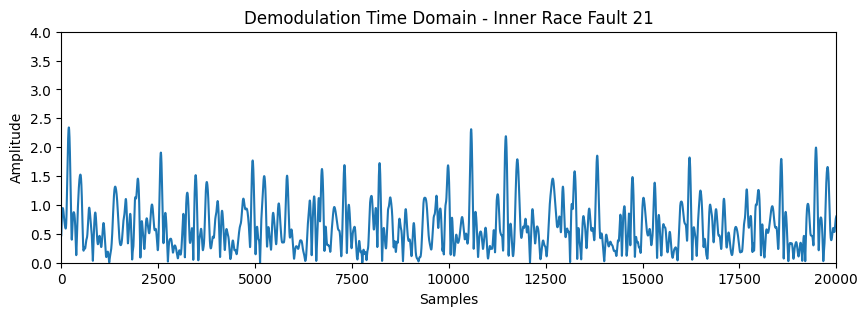

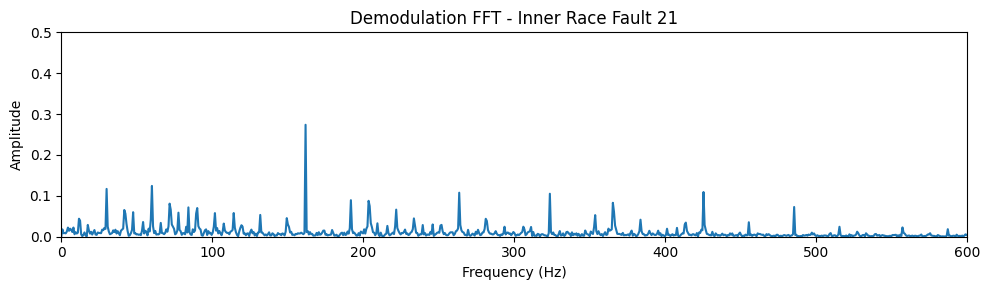

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import envelope

# CSV file paths and their labels
csv_files = ["Normal.csv", "7_IR.csv", "21_IR.csv"]
labels = ["Normal","Inner Race Fault 07", "Inner Race Fault 21"]

# Parameters
n = 65536
fs = 48000
T = 1 / fs
time = np.arange(n) / fs

for i, file in enumerate(csv_files):
    fault_data = pd.read_csv(file)
    time_series = fault_data.iloc[:, 0].values
    signal = np.array(time_series[:n])
    bp_in = (2731, 4096)           
    N = len(signal)  
    yf = fft(signal)
    xf = fftfreq(N, T)[:N // 2]  
    xf[0] = 0  
    yplot = 2.0 / N * np.abs(yf[:N // 2])  # Magnitude of the FFT
    yplot[0] = 0

    #Demodulation FFT
    x_env, x_res = envelope(signal, bp_in)
    N1 = len(x_env)                
    yf1 = fft(x_env)
    xf1 = fftfreq(N1, T)[:N1 // 2]  
    xf1[0] = 0  
    yplot1 = 2.0 / N * np.abs(yf1[:N // 2])  # Magnitude of the FFT
    yplot1[0] = 0
    
    # Plotting the FFT results
    
    plt.figure(figsize=(10, 3))
    plt.plot(signal)
    plt.title(f"Time Domain - {labels[i]}")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.xlim(0, 20000)
    plt.ylim(-5, 5)
    #FFT
    plt.figure(figsize=(10, 3))
    plt.plot(xf, yplot)
    plt.title(f"FFT - {labels[i]}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    #plt.xlim(0, 600)  
    plt.ylim(0, 0.5)  
    #Envelope - Demodulation
    plt.figure(figsize=(10, 3))
    plt.plot(x_env, label="Envelope")
    plt.title(f"Demodulation Time Domain - {labels[i]}")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.xlim(0, 20000)
    plt.ylim(0, 4)
    #Demodulation FFT
    plt.figure(figsize=(10, 3))
    plt.plot(xf1, yplot1)
    plt.title(f"Demodulation FFT - {labels[i]}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.xlim(0, 600)  
    plt.ylim(0, 0.5)  
    #plt.savefig("InnerRace_2hp")
    plt.tight_layout()
    plt.show()